## Importing the required libraries

In [1]:
!python -m pip install textblob

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
D:\Anaconda\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-

## Reading and Extracting data from .csv files

In [3]:
train_tweets = pd.read_csv('export_final_train.csv')
test_tweets = pd.read_csv('export_final_test.csv')

train_tweets

,subreddit,post
0,0,Does anyone else like taking long walks while ...
1,0,Meditation is making me anxious I do a couple ...
2,0,Rant about anxiety meds - I've been self medic...
3,0,Some advice for my friend please? I dated this...
4,0,Feeling like I’m back to where I started. I’ve...
...,...,...
595,2,I wish there was a way to feel like less of a ...
596,2,First Date Jitters Hey friends!\n\n&amp;#x200B...
597,2,"Issues at work, again. I work for an overall s..."
598,2,How do I (21F) carry on? I’ve been dealing wit...


In [4]:
train_tweets = train_tweets[['subreddit','post']]
test = test_tweets['post']
test

0      Feel like life is over because I complimented ...
1      Skin is crawling and weird sleeping Wellburtin...
2      Anxiety: what helps and when to consult a psyc...
3      Can you identify this feeling? I sometimes hav...
4      I’m not sure why this happens. My sister plays...
                             ...                        
205    PTSD episode on Dr. Phil So, recently theres t...
206    Did anyone else with PTSD who watched James' M...
207    I'm having bad episodes, and I am not sure why...
208    I am of value. My value is not something I hav...
209    Do they actually care? Feels like the people I...
Name: post, Length: 210, dtype: object

## Exploratory Data Analysis

In [5]:
# train_tweets['length'] = train_tweets['post'].apply(len)
# fig1 = sns.barplot('subreddit','post',data = train_tweets,palette='PRGn')
# plt.title('Average Word Length vs label')
# plot = fig1.get_figure()
# plot.savefig('Barplot.png')

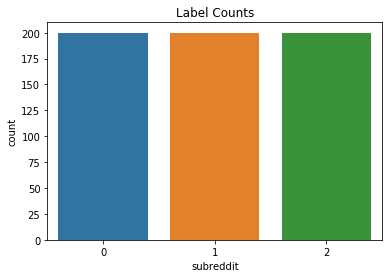

In [6]:
fig2 = sns.countplot(x= 'subreddit',data = train_tweets)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count Plot.png')

## Feature Engineering

In [7]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split()]
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [8]:
train_tweets['tweet_list'] = train_tweets['post'].apply(text_processing)
test_tweets['tweet_list'] = test_tweets['post'].apply(text_processing)

In [9]:
train_tweets

,subreddit,post,tweet_list
0,0,Does anyone else like taking long walks while ...,"[anyone, else, like, take, long, walk, snow, E..."
1,0,Meditation is making me anxious I do a couple ...,"[Meditation, make, anxious, couple, sessions, ..."
2,0,Rant about anxiety meds - I've been self medic...,"[Rant, anxiety, meds, self, medicate, Benzodia..."
3,0,Some advice for my friend please? I dated this...,"[advice, friend, please, date, girl, year, mov..."
4,0,Feeling like I’m back to where I started. I’ve...,"[Feeling, like, back, start, feel, lot, better..."
...,...,...,...
595,2,I wish there was a way to feel like less of a ...,"[wish, way, feel, like, less, target, saw, vid..."
596,2,First Date Jitters Hey friends!\n\n&amp;#x200B...,"[First, Date, Jitters, Hey, friends, amp, TL, ..."
597,2,"Issues at work, again. I work for an overall s...","[Issues, work, work, overall, supportive, comp..."
598,2,How do I (21F) carry on? I’ve been dealing wit...,"[carry, deal, PTSD, since, young, adult, worse..."


In [10]:
train_tweets[train_tweets['subreddit']==1].drop('post',axis=1).head()

,subreddit,tweet_list
200,1,"[friends, many, Throwaway, account, tire, feel..."
201,1,"[think, admit, psych, ward, really, bad, episo..."
202,1,"[Girlfriend, BPD, need, help, discuss, things,..."
203,1,"[Dealing, loss, life, years, old, quiet, borde..."
204,1,"[love, BPD, friend, cut, swallow, razorblades,..."


## Model Selection and Machine Learning

In [11]:
X = train_tweets['post']
y = train_tweets['subreddit']
test = test_tweets['post']

In [12]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['post'], train_tweets['subreddit'], test_size=0.2)

In [13]:
#Machine Learning Pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x000001265AD56CA8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [14]:
predictions = pipeline.predict(msg_test)

print("Classification report")
print(classification_report(predictions,label_test))
print ("Confusion Matrix")
print(confusion_matrix(predictions,label_test))
print("Accuracy Score")
print(accuracy_score(predictions,label_test))

Classification report
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        36
           1       0.86      0.63      0.73        51
           2       0.64      0.76      0.69        33

    accuracy                           0.75       120
   macro avg       0.75      0.77      0.75       120
weighted avg       0.77      0.75      0.75       120

Confusion Matrix
[[33  0  3]
 [ 8 32 11]
 [ 3  5 25]]
Accuracy Score
0.75


In [15]:
def predict_condition(post):
    condition = {0: 'anxiety', 1: 'bpd', 2: 'ptsd'}
    return condition[post]

In [16]:
msgt = msg_test.to_frame().reset_index()
#print(random.choice(msg_test))
#print(predict_condition(predictions[4]))

In [17]:
predictions = predictions.tolist()
msgt['predictions']=predictions

In [18]:
msgt[msgt.columns.drop(['index'])]

,post,predictions
0,Meditation is making me anxious I do a couple ...,0
1,Raise your hand if you ruined your NYE with an...,1
2,"Possible trauma from hospitalization, and peop...",2
3,PTSD resulting from car accident. Was wonderin...,2
4,Eating with anxiety I don't really know how to...,0
...,...,...
115,"Less procrastination, less anxiety, less depre...",0
116,Help How do I help my FP see that he isn't hur...,1
117,[NFSW] [Vent] [Trigger Warning] Feel like I wo...,2
118,"I have anxiety when I’m unfriended, blocked. I...",0


In [19]:
label_test_valid = test_tweets['subreddit']

In [20]:
label_test_valid

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: subreddit, Length: 210, dtype: int64

In [21]:
test_predictions = pipeline.predict(test)

print("Classification report")
print(classification_report(test_predictions,label_test_valid))
print ("Confusion Matrix")
print(confusion_matrix(test_predictions,label_test_valid))
print("Accuracy Score")
print(accuracy_score(test_predictions,label_test_valid))

Classification report
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        51
           1       0.76      0.63      0.69        84
           2       0.80      0.75      0.77        75

    accuracy                           0.73       210
   macro avg       0.73      0.75      0.73       210
weighted avg       0.74      0.73      0.73       210

Confusion Matrix
[[44  4  3]
 [20 53 11]
 [ 6 13 56]]
Accuracy Score
0.7285714285714285


In [24]:
test_predictions= test_predictions.tolist()

In [25]:
test_tweets['predictions'] = test_predictions
test_tweets

,subreddit,post,tweet_list,predictions
0,0,Feel like life is over because I complimented ...,"[Feel, like, life, compliment, younger, friend...",1
1,0,Skin is crawling and weird sleeping Wellburtin...,"[Skin, crawl, weird, sleep, WellburtinXL, Anyo...",0
2,0,Anxiety: what helps and when to consult a psyc...,"[Anxiety, help, consult, psychiatrist, long, s...",0
3,0,Can you identify this feeling? I sometimes hav...,"[identify, feel, sometimes, strange, feel, can...",1
4,0,I’m not sure why this happens. My sister plays...,"[sure, happen, sister, play, video, game, lot,...",0
...,...,...,...,...
205,2,"PTSD episode on Dr. Phil So, recently theres t...","[PTSD, episode, Dr, Phil, recently, theres, ep...",2
206,2,Did anyone else with PTSD who watched James' M...,"[anyone, else, PTSD, watch, James, McAvoy, fil...",2
207,2,"I'm having bad episodes, and I am not sure why...","[bad, episodes, sure, even, ptsd, relate, May,...",2
208,2,I am of value. My value is not something I hav...,"[value, value, something, earn, burden, love, ...",1


In [28]:
print(test[4])
print(test_predictions[4])

I’m not sure why this happens. My sister plays video games a lot, and when she does, she always invites one of her friends into a phone call to chat together while playing. 

However, hearing her laugh and talk with her friends gives me such bad anxiety. I can’t do much else besides whimper and  cry and scream. 

And every time I ask her to quiet down, she just gets louder, which makes me more anxious, which results in more screams. It eventually becomes so bad that she ends the phone call with her friend and hides out in her room. It makes me feel guilty every time. 

I’m not sure why this happens. It doesn’t happen (that bad) when anyone else in my family takes a phone call. It’s just with my sister that it gets that bad. 
0


In [32]:
print(test[170])
print(test_predictions[170])

When you have PTSD and then have another traumatic event how do you cope? I've had PTSD for a long time due to various traumatic incidents in my life, just too many to list. I honestly feel like I've lived a cursed life. In November I experienced yet another extremely traumatic event. I've been in therapy a long time and had made so much progress. There were days I was actually happy and not a mess. Then the event happened and it's like everything I worked for was gone. I'm worse than I ever have been. I started seeing a trauma therapist but I just don't feel like I can handle it. It feels like the trauma is ongoing and won't end for a long time because of hearings and court dates and the thing I dread the most, a trial. I'm at the point I don't even want justice, but everyone around me is pushing me along saying I have to do it to protect any future victims. I've been such a mess I have almost been hospitalized multiple times for suicidal ideation. I a lot of times feel like I wish my

In [48]:
print(test[80])
print(test_predictions[80])

Pregnant and :( I'm 35 weeks pregnant and the father and I aren't together. He's told me his family would consider it their biggest fear if we ended up together. Just now I asked if we could see each other this week and he said no, he wants to get an early night one night and he's out with friends every other night (movies, sports, dinner, art exhibition etc). He said, just tell me what you want to say now over the phone, and I said I just wanted us to talk in person, and he said suit yourself and we ended the conversation. I have no idea when we'll talk.

Up until recently I thought my mom would come over for the birth but that's off now her malignant NPD husband who severely abused me as a child/teenager is back (she has BPD and was equally abusive but I was hoping things might have changed). Nothing has changed in that situation since that time.

I feel so sad and alone. I'm trying to stay positive because I have to for the baby. I have no friends and am totally isolated. I've seen 